# Using Neutron Star Mergers

Prepared by: Benoit Côté

This notebook describes how to use neutron star mergers with NuPyCEE.  Here we focus on <a href="http://adsabs.harvard.edu/abs/2017arXiv171109172R">SYGMA</a>, the simple stellar population code, but the same parameters can be used in <a href="http://adsabs.harvard.edu/abs/2017ApJ...835..128C">OMEGA</a>, the galactic chemical evolution code.  As shown below, there are several implementation options for including neutron star mergers.

In [1]:
# Import python modules
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Import the NuPyCEE codes
from NuPyCEE import sygma
from NuPyCEE import omega

# Select the r-process yield table used for neutron star mergers.
# This yield table is normalized to 1 Msun.
nsmerger_table = 'yield_tables/r_process_arnould_2007.txt'

## 1. Constant Coalescence Time

This is the simplest implementation.  It assumes that all neutron star mergers in a stellar population occur after a constant delay time (coalescence time) following the formation of the progenitor stars.  There is no delay-time distribution function.

In [2]:
# Define the number of neutron star mergers per units of stellar mass formed.
# As a guideline, it is ~1e-2 for core-collapse SNe, and ~1e-3 for Type Ia SNe.
nb_nsm_per_m = 2.0e-5

# Define the total mass ejected per neutron star merger
m_ej_nsm = 1.0e-2

In [3]:
# Run simple stellar populations with different coalescence time using "t_nsm_coal".
# The mass of the population (mgal) is 1 Msun for simplicity
kwargs = {"ns_merger_on":True, "mgal":1.0, "iniZ":0.001,
          "nb_nsm_per_m":nb_nsm_per_m, "m_ej_nsm":m_ej_nsm}
s1_1e7 = sygma.sygma(t_nsm_coal=1e7, **kwargs)
s1_1e8 = sygma.sygma(t_nsm_coal=1e8, **kwargs)
s1_1e9 = sygma.sygma(t_nsm_coal=1e9, **kwargs)

SYGMA run in progress..
   SYGMA run completed - Run time: 0.03s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.03s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.03s


<IPython.core.display.Javascript object>


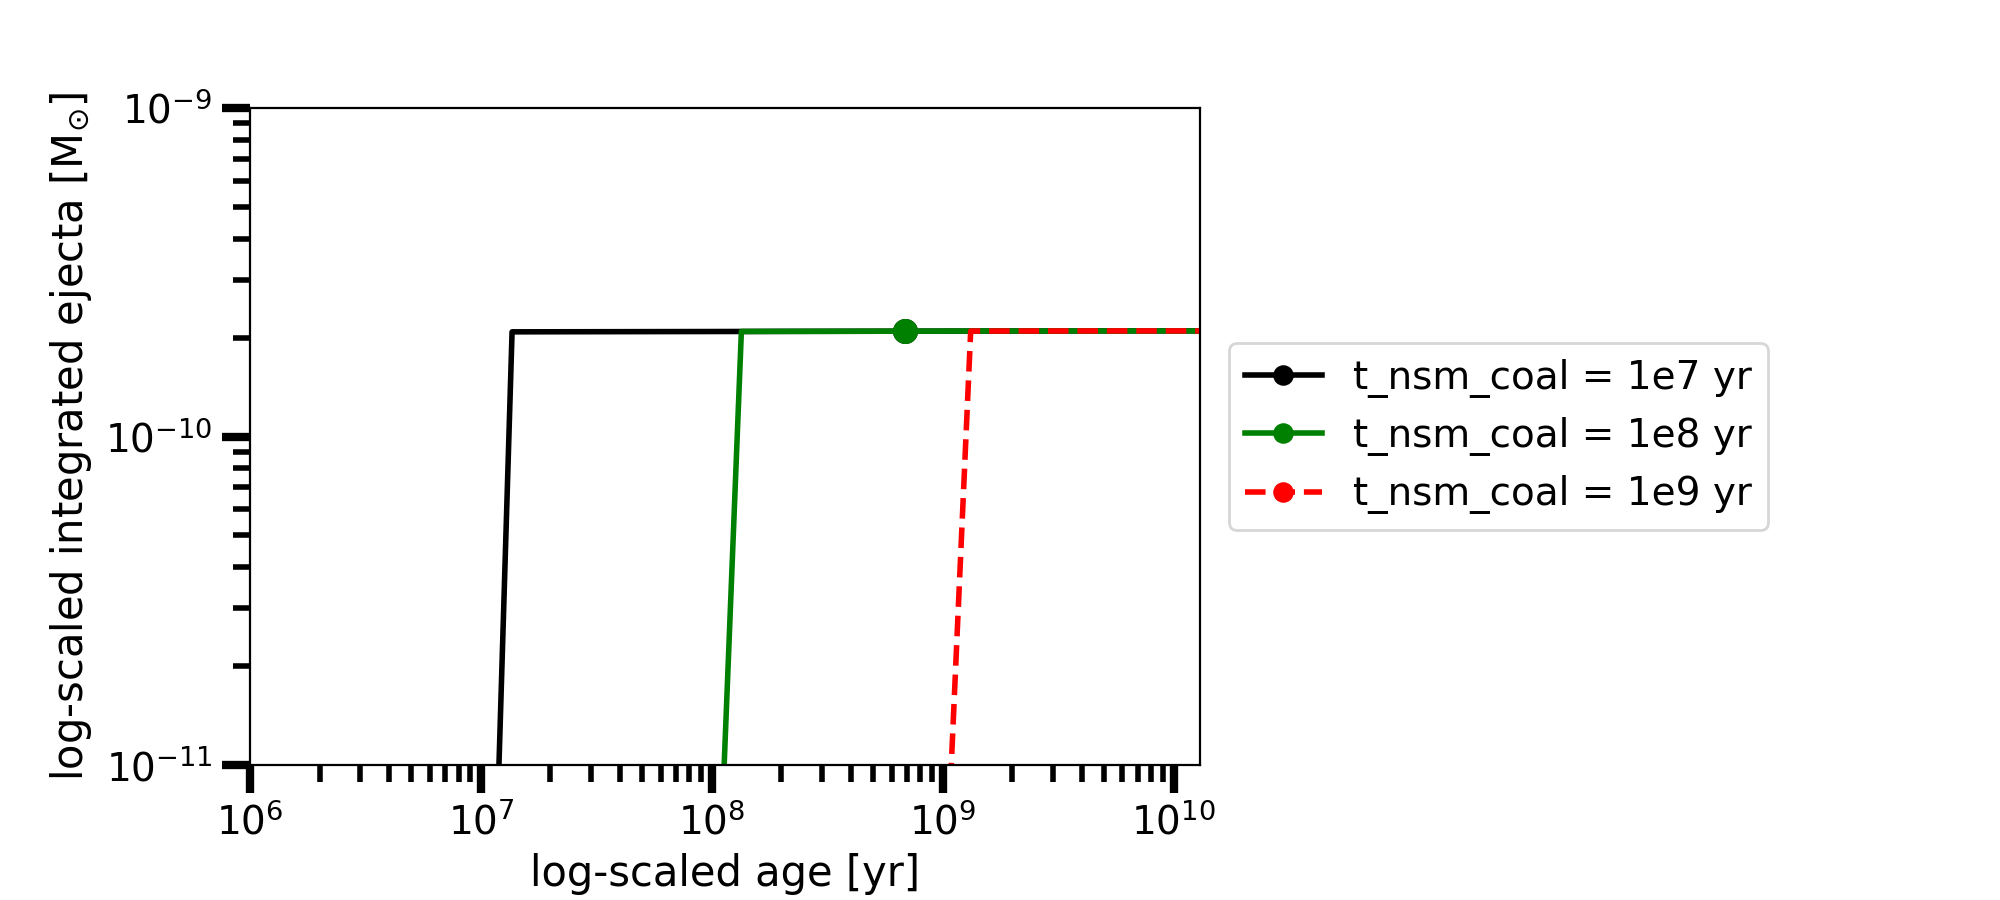

(1e-11, 1e-09)

In [5]:
# Plot the cumulated mass of Eu ejected by neutron star mergers
%matplotlib nbagg
specie = 'Eu'
s1_1e7.plot_mass(specie=specie, label='t_nsm_coal = 1e7 yr')
s1_1e8.plot_mass(specie=specie, label='t_nsm_coal = 1e8 yr', color='g')
s1_1e9.plot_mass(specie=specie, label='t_nsm_coal = 1e9 yr', color='r', shape='--')
plt.ylim(1e-11,1e-9)

## 2. Power-Law Delay-Time Distribution

This option assumes a power law in the form of $t^{-\alpha}$ for the delay-time distrubution function of neutron star mergers.  Such a function can be seen as the probability of a neutron star merger to occur at a given time following the formation of the progenitor stars.

**Important note**: This implementation should not be used with systems that only have a few neutron star mergers (e.g., ultra faint galaxies).  For example, if only one merger event occurs in the system, using a long-lasting delay-time distribution will distribute the ejecta of one event over several Gyr, which is un-physical.

In [6]:
# Define the number of neutron star mergers per units of stellar mass formed.
# As a guideline, it is ~1e-2 for core-collapse SNe, and ~1e-3 for Type Ia SNe.
nb_nsm_per_m = 2.0e-5

# Define the total mass ejected per neutron star merger
m_ej_nsm = 1.0e-2

In [7]:
# Run simple stellar populations with different power laws using "nsm_dtd_power"
# nsm_dtd_power = [t_min, t_max, index]
#   t_min: minimum coalescence time [yr]
#   t_max: maximum coalescence time [yr]
#   index: power-law index alpha
# The mass of the population (mgal) is 1 Msun for simplicity.
kwargs = {"ns_merger_on":True, "mgal":1.0, "iniZ":0.001,
          "nb_nsm_per_m":nb_nsm_per_m, "m_ej_nsm":m_ej_nsm}
s2_long  = sygma.sygma(nsm_dtd_power=[1e7, 10e9, -1], **kwargs)
s2_steep = sygma.sygma(nsm_dtd_power=[1e7, 10e9, -2], **kwargs)
s2_short = sygma.sygma(nsm_dtd_power=[1e8, 1e9,  -1], **kwargs)

SYGMA run in progress..
   SYGMA run completed - Run time: 0.03s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.03s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.03s


<IPython.core.display.Javascript object>


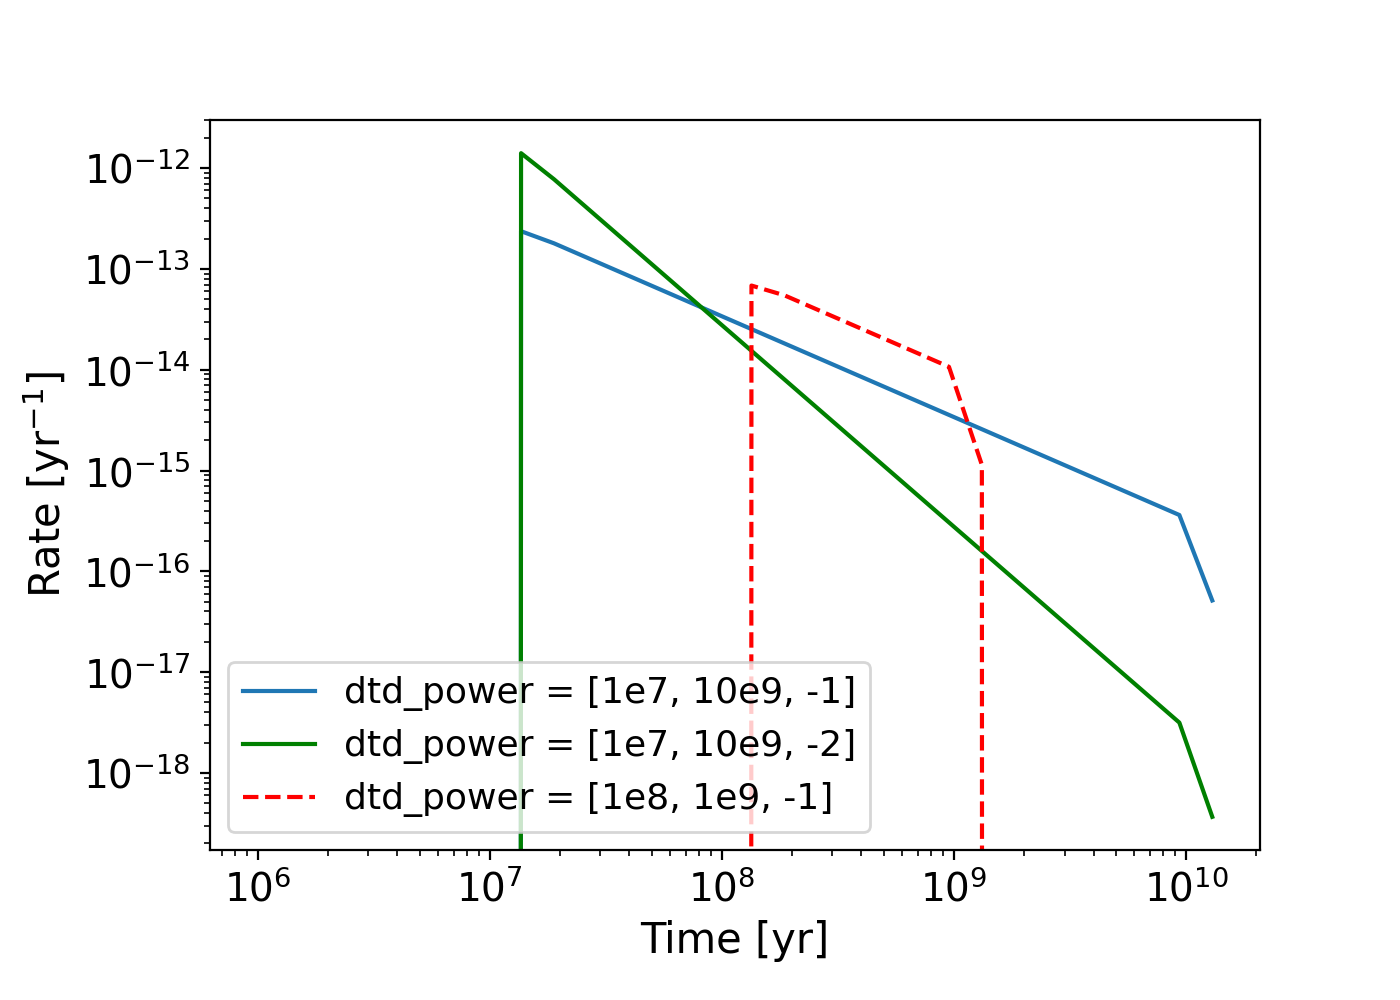

In [9]:
# Plot the delay-time distributions
%matplotlib nbagg
plt.figure(figsize=(7,5))
plt.plot(s2_long.history.age[1:], s2_long.nsm_numbers/s2_long.history.timesteps,\
         label='dtd_power = [1e7, 10e9, -1]')
plt.plot(s2_steep.history.age[1:], s2_steep.nsm_numbers/s2_steep.history.timesteps,\
         label='dtd_power = [1e7, 10e9, -2]', color='g')
plt.plot(s2_short.history.age[1:], s2_short.nsm_numbers/s2_short.history.timesteps,\
         label='dtd_power = [1e8, 1e9, -1]',  color='r', linestyle='--')
plt.legend(fontsize=13, frameon=True)

# Visual
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time [yr]', fontsize=15)
plt.ylabel('Rate [yr$^{-1}$]', fontsize=15)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.15)
matplotlib.rcParams.update({'font.size': 14.0})

<IPython.core.display.Javascript object>


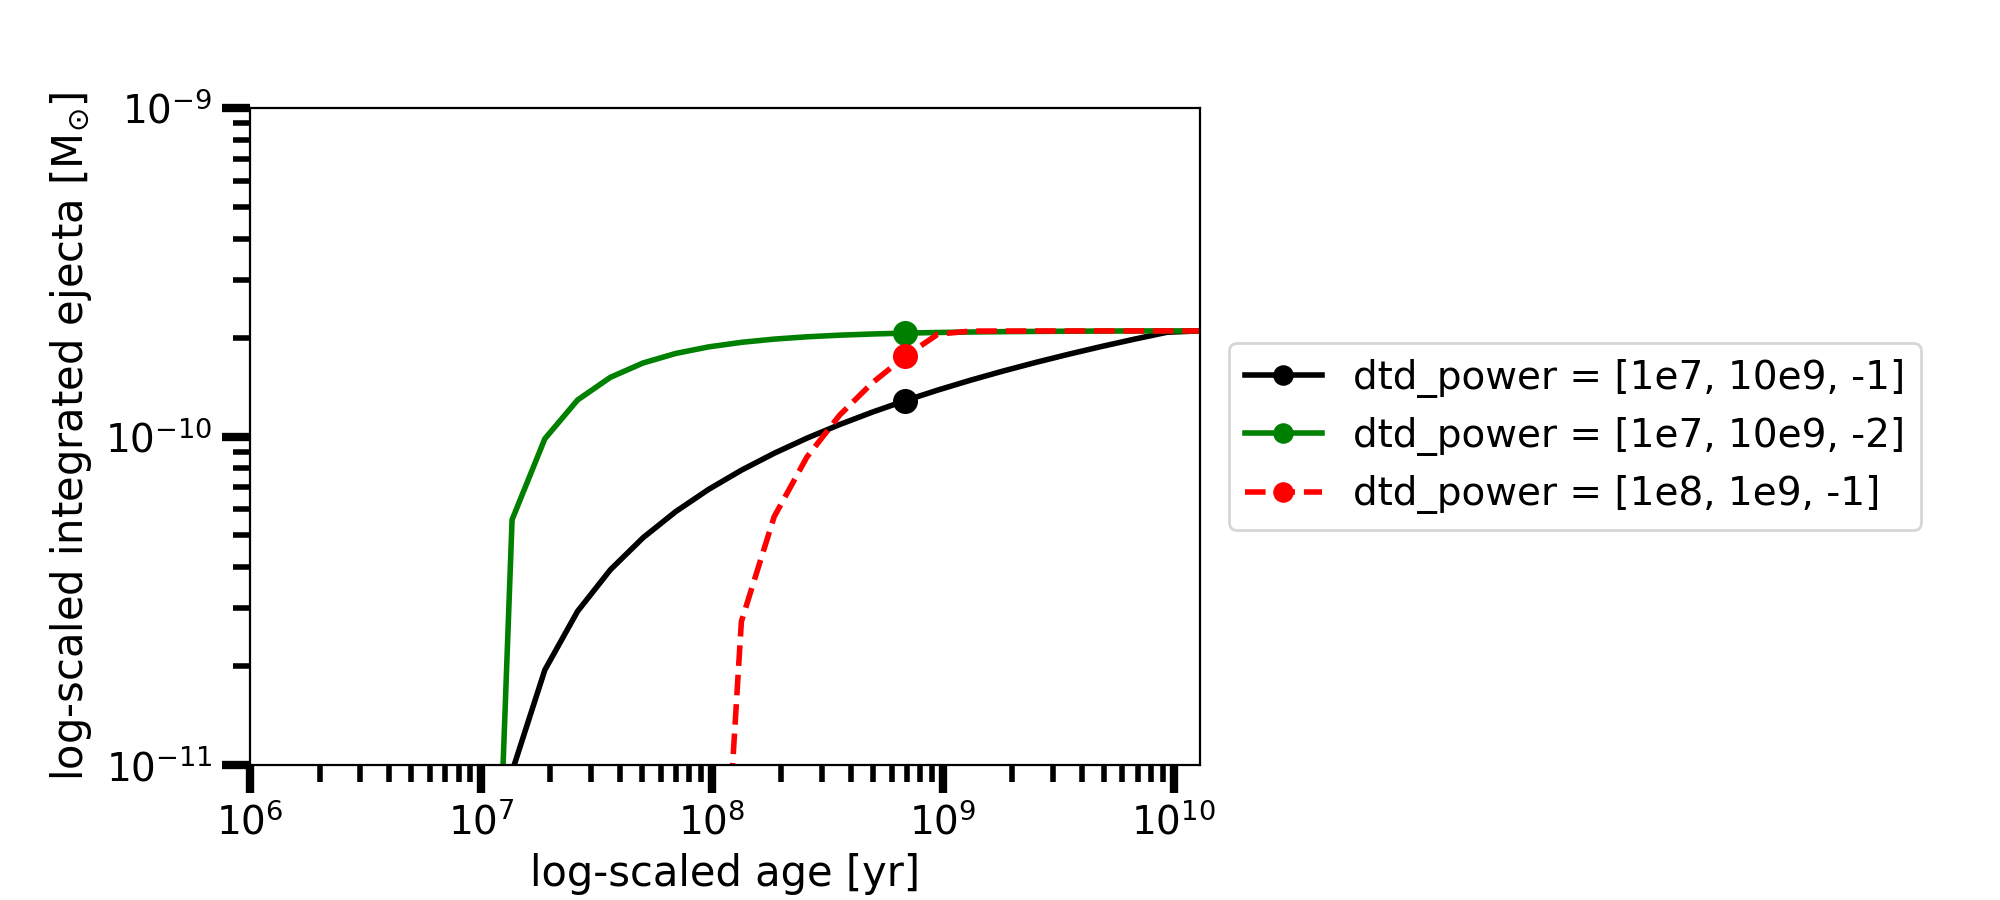

(1e-11, 1e-09)

In [10]:
# Plot the cumulated mass of Eu ejected by neutron star mergers
%matplotlib nbagg
specie = 'Eu'
s2_long.plot_mass( specie=specie, label='dtd_power = [1e7, 10e9, -1]')
s2_steep.plot_mass(specie=specie, label='dtd_power = [1e7, 10e9, -2]', color='g')
s2_short.plot_mass(specie=specie, label='dtd_power = [1e8, 1e9, -1]',  color='r', shape='--')
plt.ylim(1e-11,1e-9)

## 3. Arbitrary Delay-Time Distribution

It is possible to define an arbitrary shape for the delay-time distribution of neutron star mergers using the <a href="https://github.com/NuGrid/NuPyCEE/blob/master/DOC/Capabilities/Delayed_extra_sources.ipynb">Delayed Extra Source</a> option.  This allows to include results from population synthesis models and to include metallicity-dependent distributions.  For more information on this option, click <a href="https://github.com/NuGrid/NuPyCEE/blob/master/DOC/Capabilities/Delayed_extra_sources.ipynb">here</a>.

**Note**: This option can be used for black hole neutron star mergers as well.

In [11]:
# Define the number of neutron star mergers per units of stellar mass formed.
# As a guideline, it is ~1e-2 for core-collapse SNe, and ~1e-3 for Type Ia SNe.
nb_nsm_per_m = 2.0e-5

# Define the total mass ejected per neutron star merger
m_ej_nsm = 1.0e-2

In [12]:
# Event rate [yr^-1] as a function of time [yr].
# Times need to be in order. No event will occurs before the lowest time and after the largest time.
# The code will interpolate the data point provided (in linear or in log-log space).
t = [1e7, 1e8,  1e9]   # Can be any length.
R = [5.0, 1e-4, 1.0] # This is only the shape of the DTD, as it will be re-normalized.

# Build the input DTD array
dtd = []
for i in range(0,len(t)):
    dtd.append([t[i], R[i]])
    
# Add the DTD array in the delayed_extra_dtd array.
delayed_extra_dtd = [[dtd]]
# [[ ]] for the indexes for the number of sources (here 1) and metallicities (here 1)

# Define the total number of event per unit of Msun formed.  This will normalize the DTD.
delayed_extra_dtd_norm = [[nb_nsm_per_m]]
# [[ ]] for the indexes for the number of sources (here 1) and metallicities (here 1)

# Define the yields path for the extra source
delayed_extra_yields = [nsmerger_table]
# [ ] and not [[ ]] because the nb_Z is in the yields table as in SN Ia yields
# See yield_tables/sn1a_ivo12_stable_z.txt for an example of such yields template.

# Define the total mass ejected by an extra source
delayed_extra_yields_norm = [[m_ej_nsm]]

In [13]:
# Run a stellar population with this option
# Important: You need to turn off neutron star mergers, since
#           they are now modeled via the delayed-extra-source option.
s3 = sygma.sygma(mgal=1.0, iniZ=0.001, ns_merger_on=False, \
                 delayed_extra_dtd=delayed_extra_dtd, \
                 delayed_extra_dtd_norm=delayed_extra_dtd_norm, \
                 delayed_extra_yields=delayed_extra_yields, \
                 delayed_extra_yields_norm=delayed_extra_yields_norm)

SYGMA run in progress..
   SYGMA run completed - Run time: 0.03s


<IPython.core.display.Javascript object>


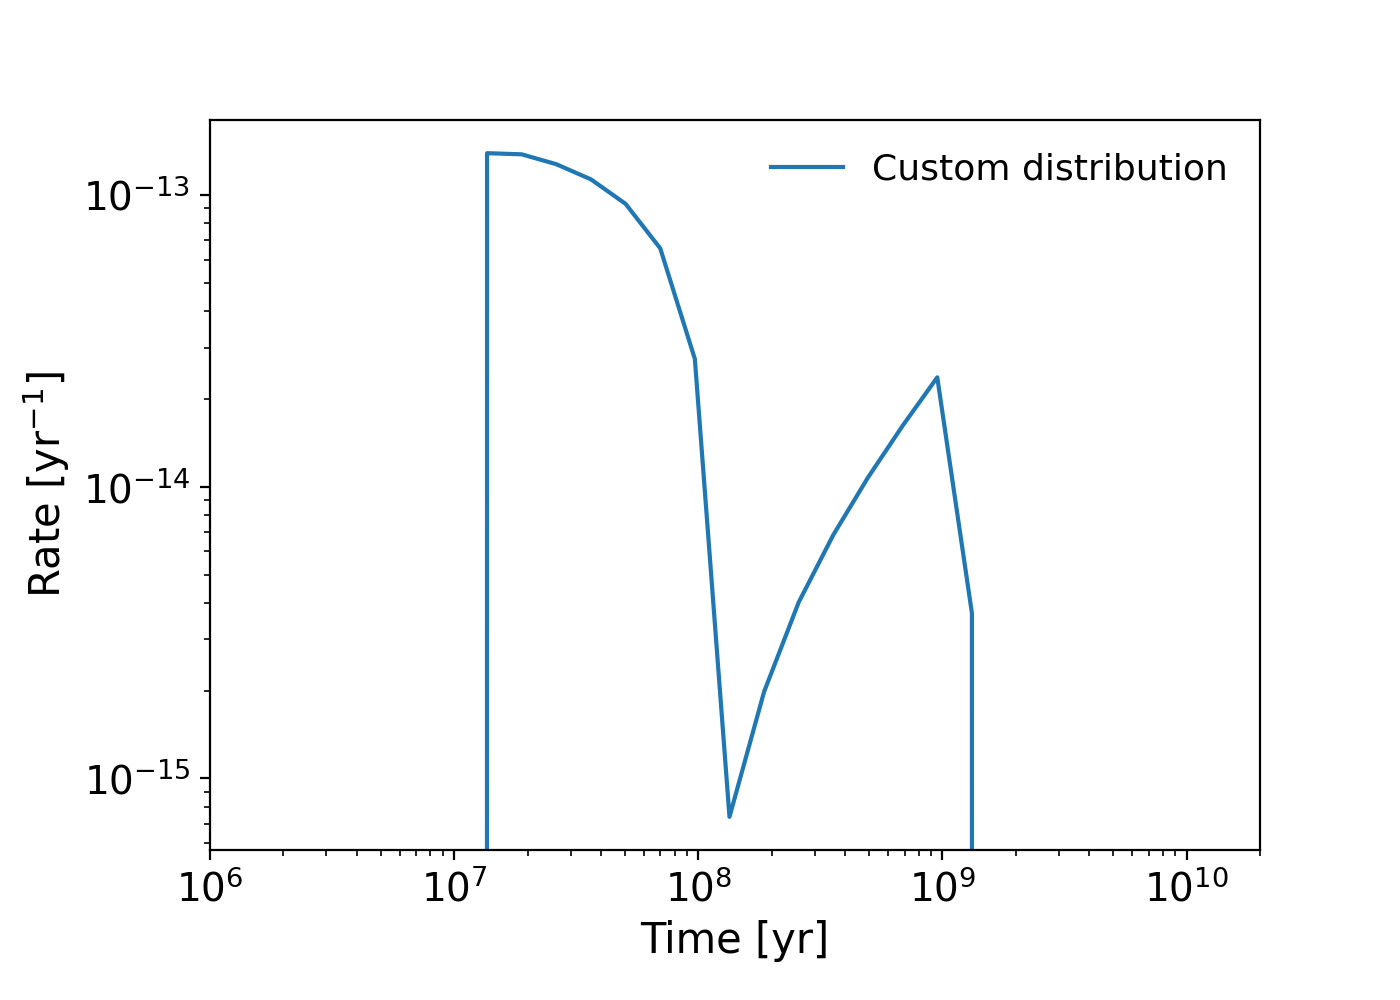

In [14]:
# Plot the delay-time distribution
%matplotlib nbagg
plt.figure(figsize=(7,5))
plt.plot(s3.history.age[1:], s3.delayed_extra_numbers[0]/s3.history.timesteps,\
         label='Custom distribution')
plt.legend(fontsize=13, frameon=False)

# Visual
plt.xlim(1e6,2e10)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time [yr]', fontsize=15)
plt.ylabel('Rate [yr$^{-1}$]', fontsize=15)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.15)
matplotlib.rcParams.update({'font.size': 14.0})

<IPython.core.display.Javascript object>


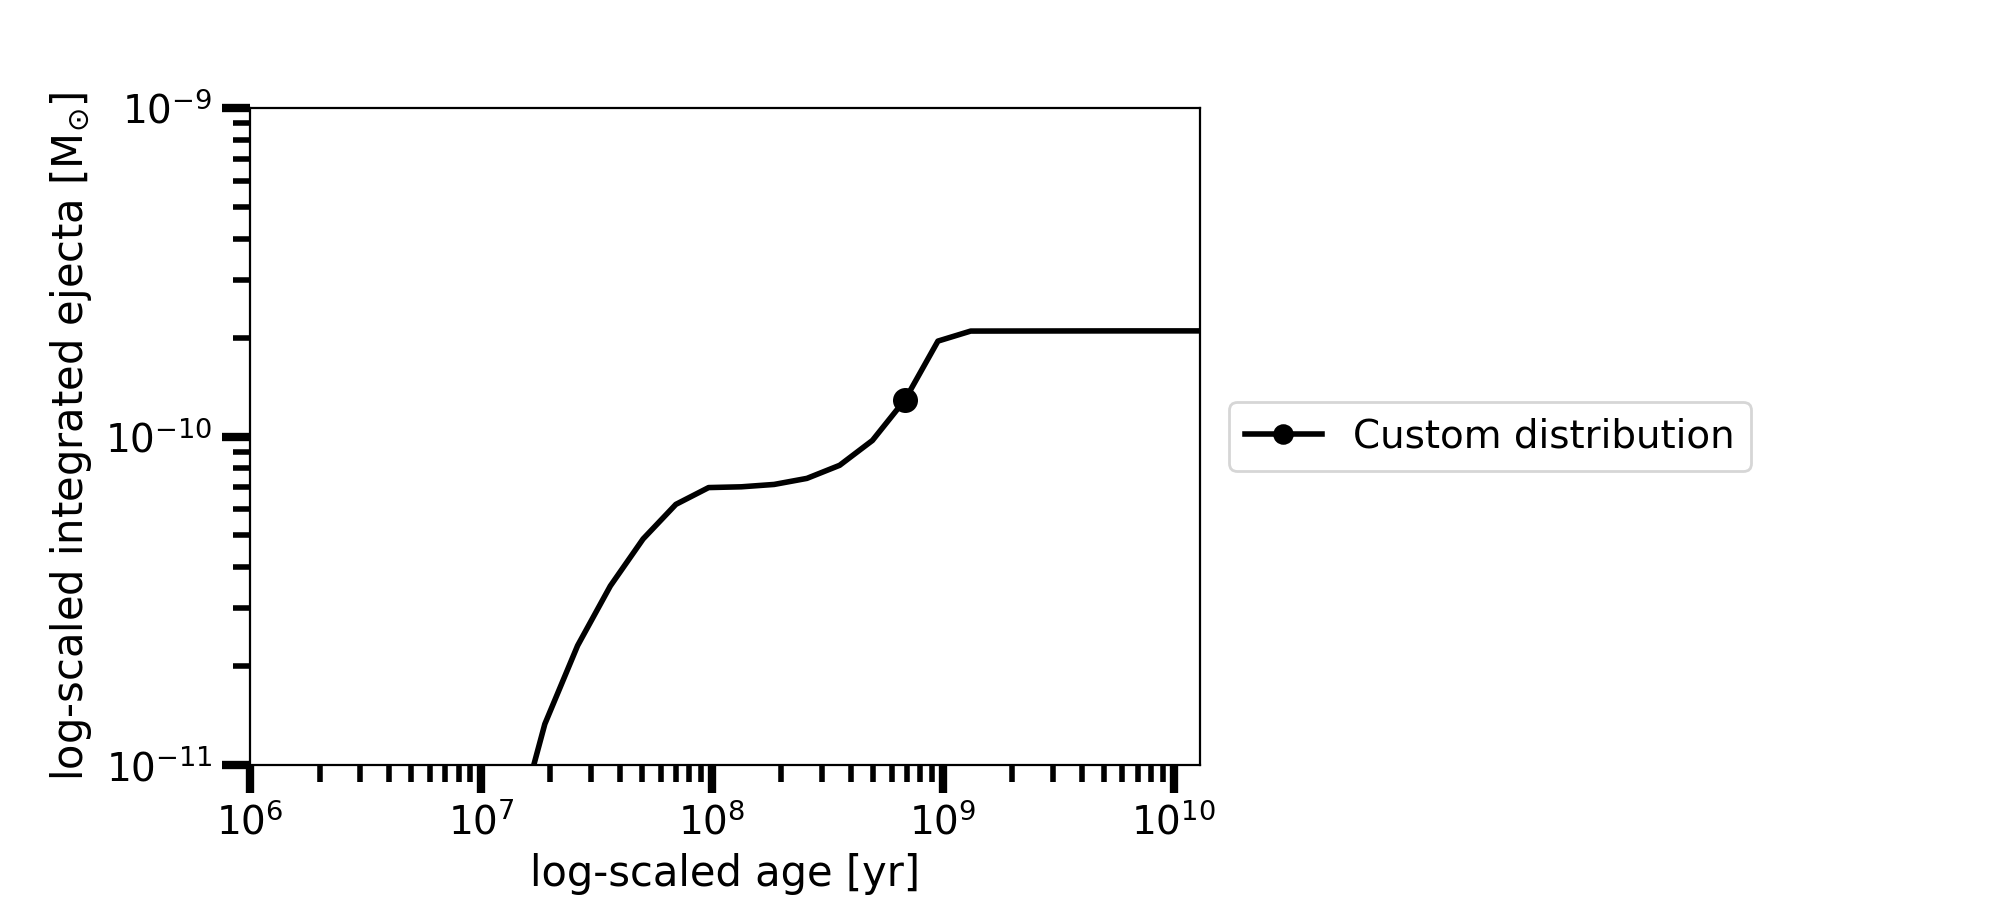

(1e-11, 1e-09)

In [15]:
# Plot the cumulated mass of Eu ejected by neutron star mergers
%matplotlib nbagg
specie = 'Eu'
s3.plot_mass(specie=specie, label='Custom distribution')
plt.ylim(1e-11,1e-9)

## 4. Population Synthesis of Dominik+12

This option uses the delay-time distribution functions predicted by the population synthesis model of <a href="http://adsabs.harvard.edu/abs/2012ApJ...759...52D">Dominik et al. (2012)</a>.

In [16]:
# Run a stellar population with this option
s4 = sygma.sygma(mgal=1.0, iniZ=0.01, ns_merger_on=True, \
                 f_binary=1.0, f_merger=0.005, m_ej_nsm=m_ej_nsm)

SYGMA run in progress..
   SYGMA run completed - Run time: 0.03s


<IPython.core.display.Javascript object>


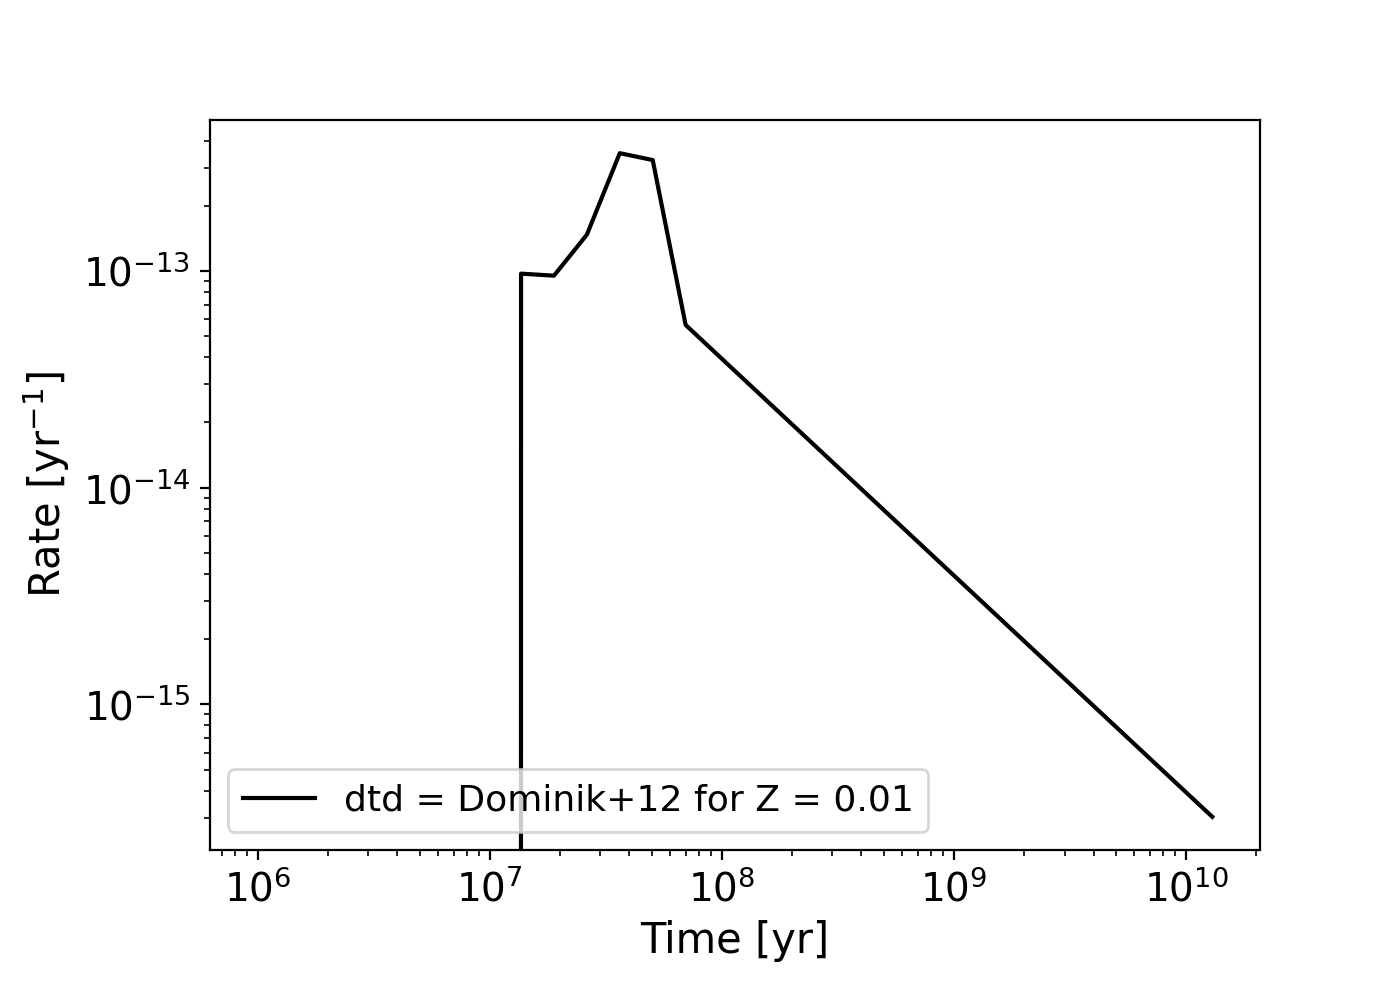

In [18]:
# Plot the delay-time distributions
%matplotlib nbagg
plt.figure(figsize=(7,5))
plt.plot(s4.history.age[1:], s4.nsm_numbers/s4.history.timesteps,\
         label='dtd = Dominik+12 for Z = 0.01', color='k')
plt.legend(fontsize=13, frameon=True)

# Visual
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time [yr]', fontsize=15)
plt.ylabel('Rate [yr$^{-1}$]', fontsize=15)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.15)
matplotlib.rcParams.update({'font.size': 14.0})

<IPython.core.display.Javascript object>


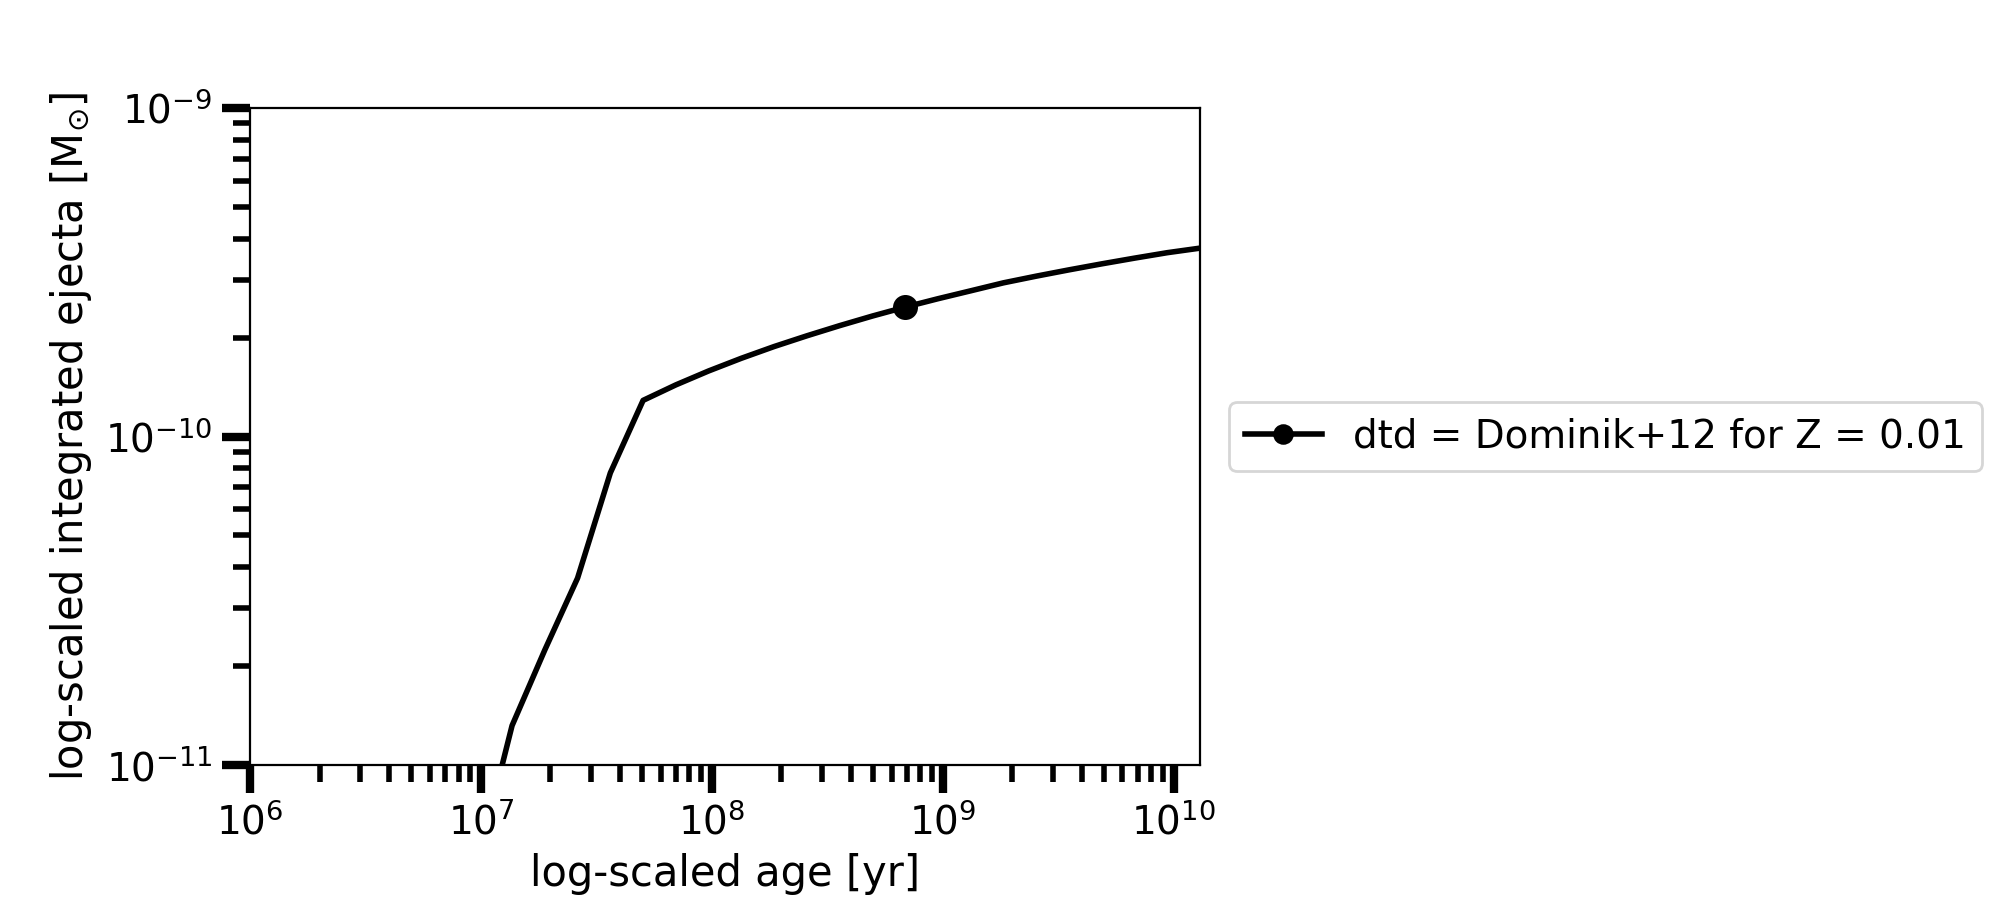

(1e-11, 1e-09)

In [19]:
# Plot the cumulated mass of Eu ejected by neutron star mergers
%matplotlib nbagg
specie = 'Eu'
s4.plot_mass(specie=specie, label='dtd = Dominik+12 for Z = 0.01')
plt.ylim(1e-11,1e-9)